In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\91829\\Downloads\\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


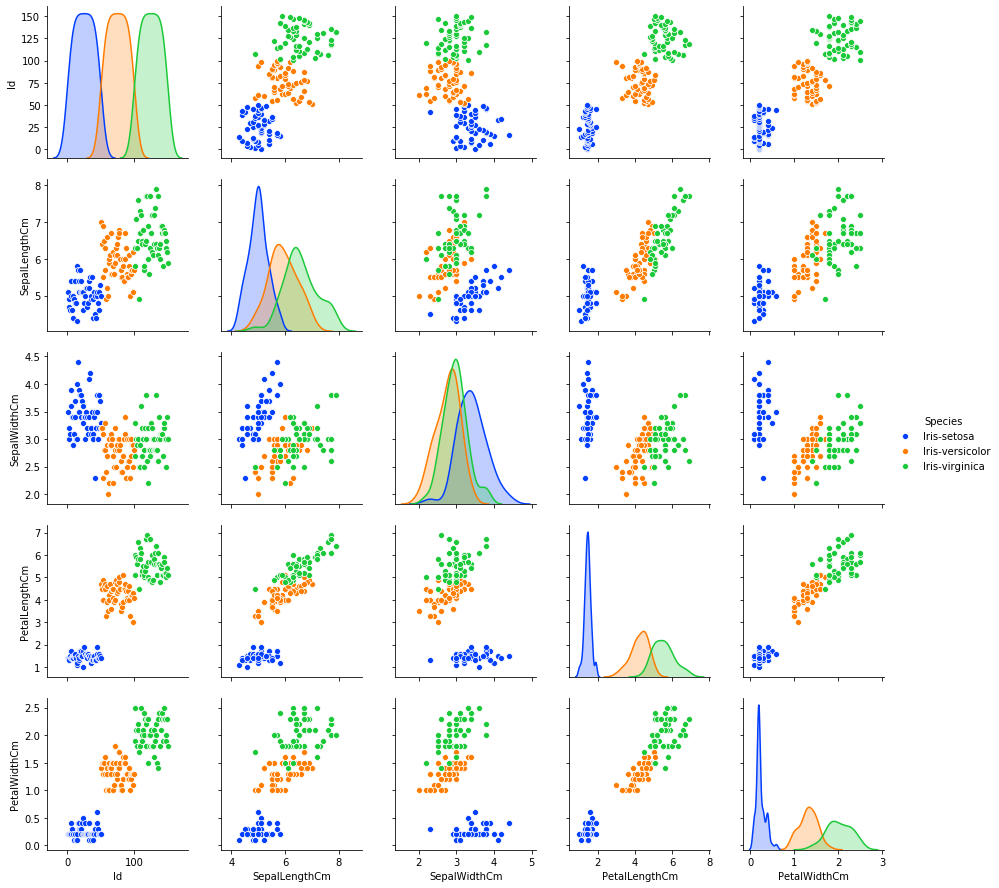

In [10]:
#To check linearly-separable demo dataset
y = data.Species
X = data.drop(['Species', 'Id'],axis=1)

sns.pairplot(data, hue="Species",palette="bright")

In [19]:
#To focus on the graph petal_width-petal_length, for the classes Setosa and Versicolor.
df=data[(data['Species']!='Iris-virginica')]
df=df.drop(['SepalLengthCm','SepalWidthCm'], axis=1)
df.head()

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa


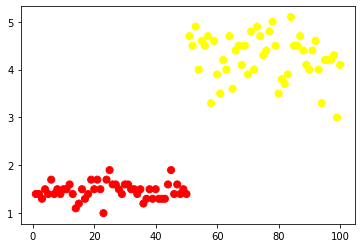

In [21]:
#To convert categorical values to numerical target

import matplotlib.pyplot as plt

df=df.replace('Iris-setosa', 0)
df=df.replace('Iris-versicolor', 1)

X=df.iloc[:,0:2]
y=df['Species']

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

In [22]:
#training algorithm:

from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
model.support_vectors_

array([[50. ,  1.4],
       [51. ,  4.7]])

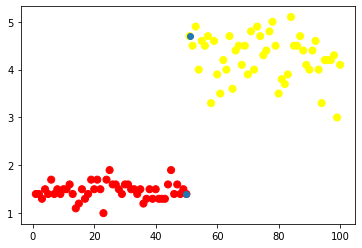

In [24]:
#visualize the coordinates of support vectors:

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

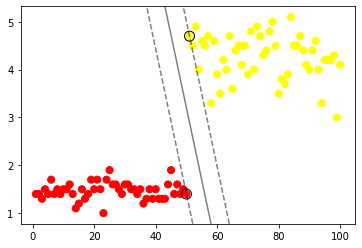

In [26]:
#visualizing all the elements of our algorithm:

ax = plt.gca()

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

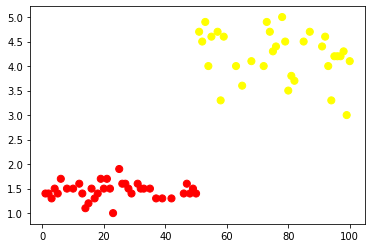

In [27]:
# reducing the size of sample

red_sample=df.sample(frac=0.7)
X=red_sample.iloc[:,0:2]
y=red_sample['Species']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

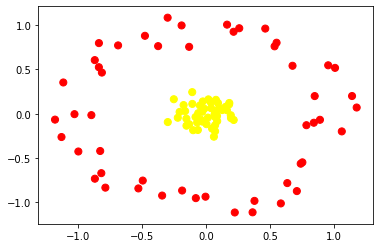

In [28]:
#the Radial Basis Function

from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Text(0.5, 0, 'r')

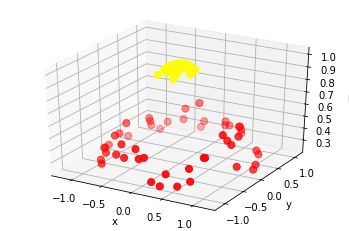

In [32]:
#3D to 2D

from mpl_toolkits import mplot3d

#setting the 3rd dimension with RBF centered on the middle clump

r = np.exp(-(X ** 2).sum(1))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [33]:
# fitting model with kernel=rbf rather than kernel=linear:

model=SVC(kernel='rbf').fit(X, y)

C:\Users\91829\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
model.support_vectors_

array([[ 0.84246283, -0.10144636],
       [ 0.21665678,  0.92480688],
       [ 0.84929576,  0.19936614],
       [ 0.676329  ,  0.54119323],
       [-0.12979509,  0.7547335 ],
       [ 0.78464759, -0.12919337],
       [-0.1845725 , -0.8662162 ],
       [-0.00216289, -0.93565133],
       [-0.81029665,  0.46449366],
       [-0.37177339,  0.7629183 ],
       [-0.89220556, -0.01552546],
       [ 0.7400926 , -0.56348452],
       [-0.49161163, -0.75380791],
       [-0.82344575, -0.42023214],
       [-0.09885537, -0.18540533],
       [ 0.06318774, -0.25890023],
       [-0.10583832,  0.24398937],
       [-0.24937757,  0.16385433],
       [ 0.19631025, -0.04879591],
       [ 0.21774005, -0.07026117],
       [-0.21834517, -0.044961  ],
       [-0.29634103, -0.09375558],
       [ 0.07263396, -0.1975959 ],
       [-0.20420975,  0.02040621],
       [ 0.18188047,  0.10527744],
       [ 0.19496425, -0.01670827],
       [ 0.18330588,  0.12157994]])